In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_dataframe(df_clustering, title): 

    # Convert the index to datetime
    df_clustering.index = pd.to_datetime(df_clustering.index)

    dot_com_start = '2000-06-30'
    dot_com_end = '2002-12-31'

    financial_start = '2007-12-31'
    financial_end = '2009-12-31'

    oil_start = '2014-06-30'
    oil_end = '2016-03-31'

    # Plotting
    ax = df_clustering.plot(kind="line", figsize=(20, 6), style=["-", "-", "-", "-", "--", "--", "--"], legend=False)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")

    # Set x-axis labels to each date in the DataFrame's index, skipping one by one
    xticks_labels = df_clustering.index[::2]  # Change the number '2' to skip more/less
    plt.xticks(ticks=xticks_labels, labels=[label.strftime('%Y-%m-%d') for label in xticks_labels], rotation=45)

    # Apply colored spans
    # SPAN LABELS SET TO NONE!!!!
    ax.axvspan(pd.to_datetime(dot_com_start), pd.to_datetime(dot_com_end), color='yellow', alpha=0.3, label=None)
    ax.axvspan(pd.to_datetime(financial_start), pd.to_datetime(financial_end), color='orange', alpha=0.3, label=None)
    ax.axvspan(pd.to_datetime(oil_start), pd.to_datetime(oil_end), color='red', alpha=0.3, label=None)
    
    ax.legend(loc='upper left')
    plt.grid(True)
    plt.show()
    
    

In [2]:
def drop_cols(df, substring):
    return df.loc[:, ~df.columns.str.contains(substring)]

def create_dataframe_with_substring(df, substring):
    filtered_columns = [col for col in df.columns if substring in col]
    return df[filtered_columns]



# PREPARE DATAFRAMES

In [17]:
m1 = pd.read_csv("motif_results_1.csv", index_col=0)
m2 = pd.read_csv("motif_results_2.csv", index_col=0)
m3 = pd.read_csv("motif_results_3.csv", index_col=0)
m4 = pd.read_csv("motif_results_4.csv", index_col=0)


m1 = m1.drop([col for col in m1.columns if 'motif4' in col or 'motif5' in col], axis=1)

date_column_name = "date"

dataframe = m1.merge(m2, on=date_column_name, how="outer").merge(m3, on=date_column_name, how="outer").merge(m4, on=date_column_name, how="outer")

dataframe.set_index('date', inplace=True)

print(dataframe.columns)


Index(['total_graph_motif1', 'total_graph_motif2', 'total_graph_motif3',
       'software_industry_motif1', 'software_industry_motif2',
       'software_industry_motif3', 'oil_industry_motif1',
       'oil_industry_motif2', 'oil_industry_motif3',
       'real_estate_industry_motif1', 'real_estate_industry_motif2',
       'real_estate_industry_motif3', 'total_graph_motif4',
       'total_graph_motif5', 'total_graph_motif6', 'software_industry_motif4',
       'software_industry_motif5', 'software_industry_motif6',
       'oil_industry_motif4', 'oil_industry_motif5', 'oil_industry_motif6',
       'real_estate_industry_motif4', 'real_estate_industry_motif5',
       'real_estate_industry_motif6', 'total_graph_motif7',
       'total_graph_motif8', 'software_industry_motif7',
       'software_industry_motif8', 'oil_industry_motif7',
       'oil_industry_motif8', 'real_estate_industry_motif7',
       'real_estate_industry_motif8', 'total_graph_motif9',
       'total_graph_motif10', 'total_grap

In [18]:
dataframe.head()

,total_graph_motif1,total_graph_motif2,total_graph_motif3,software_industry_motif1,software_industry_motif2,software_industry_motif3,oil_industry_motif1,oil_industry_motif2,oil_industry_motif3,real_estate_industry_motif1,...,software_industry_motif11,software_industry_motif12,oil_industry_motif9,oil_industry_motif10,oil_industry_motif11,oil_industry_motif12,real_estate_industry_motif9,real_estate_industry_motif10,real_estate_industry_motif11,real_estate_industry_motif12
date,,,,,,,,,,,,,,,,,,,,,
1999-06-30,365,42,3584,8,3,190,11,0,48,3,...,62,216,359,326,18,17,325,363,278,288
1999-09-30,424,64,7846,22,1,274,5,0,104,14,...,365,118,456,596,9,14,31,16,203,259
1999-12-31,281,2,7748,23,0,366,6,0,192,12,...,47,61,602,743,11,15,348,347,119,114
2000-03-31,482,3,12730,75,0,504,0,0,262,5,...,143,295,772,774,0,23,253,243,225,304
2000-06-30,340,26,11984,20,0,814,0,0,260,0,...,128,174,406,909,0,26,276,89,92,286


# PLOT MOTIFS

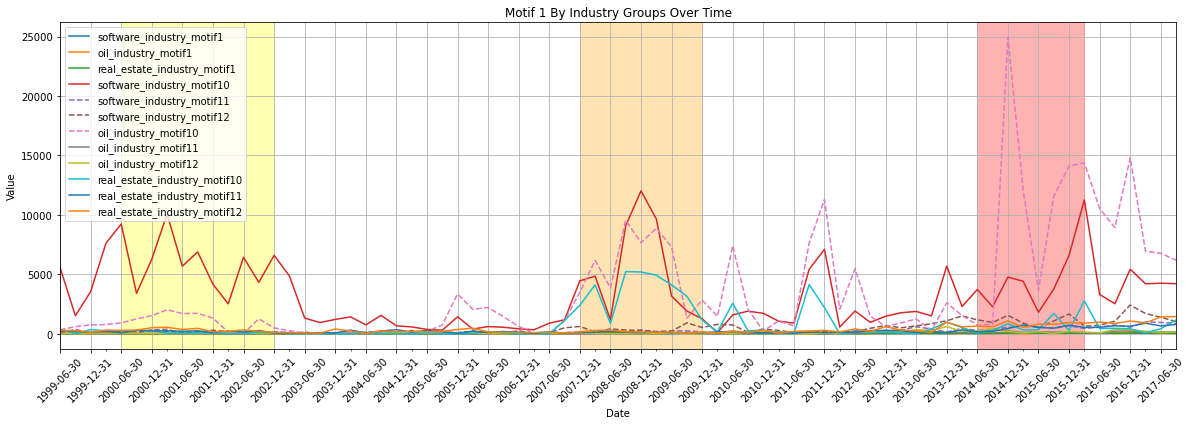

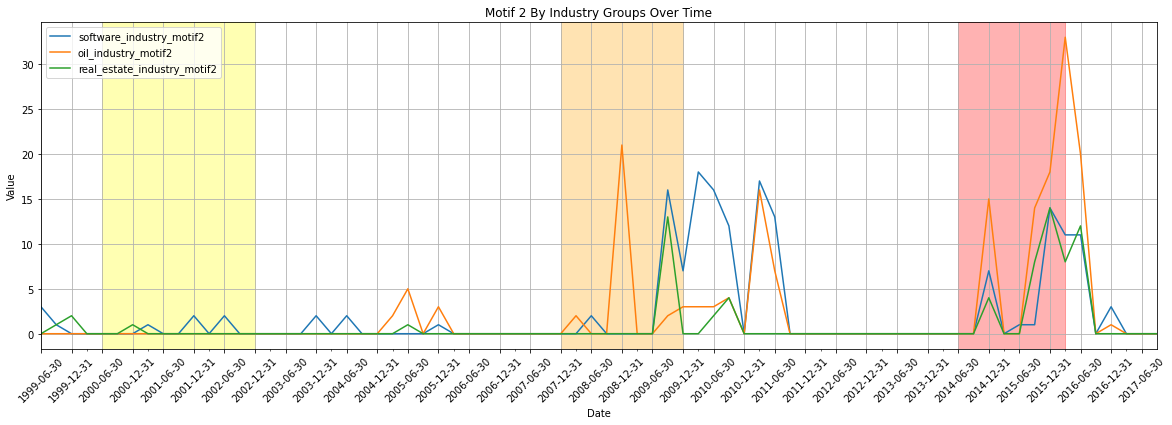

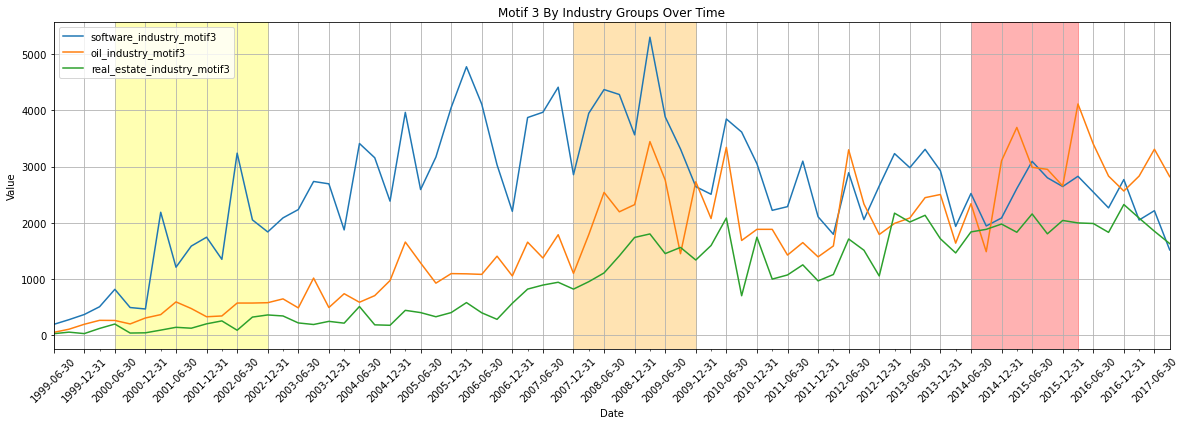

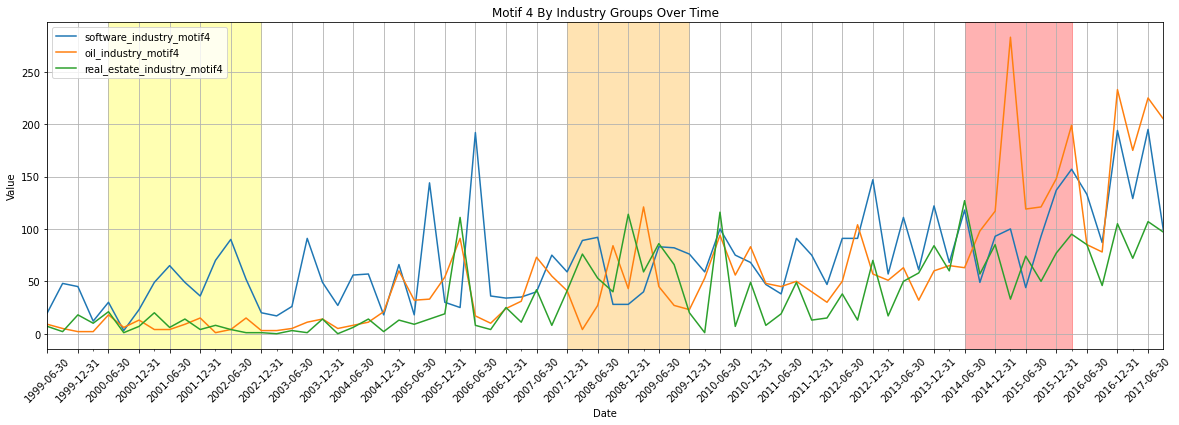

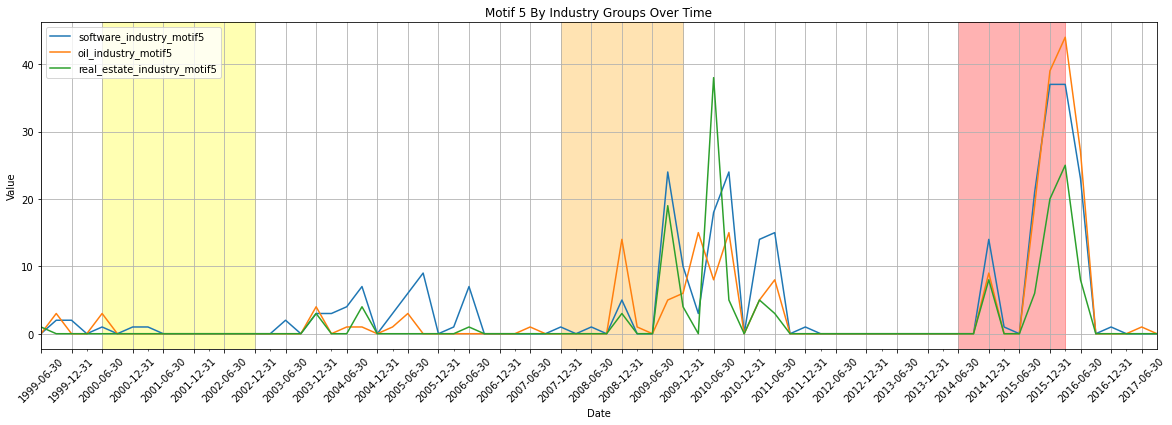

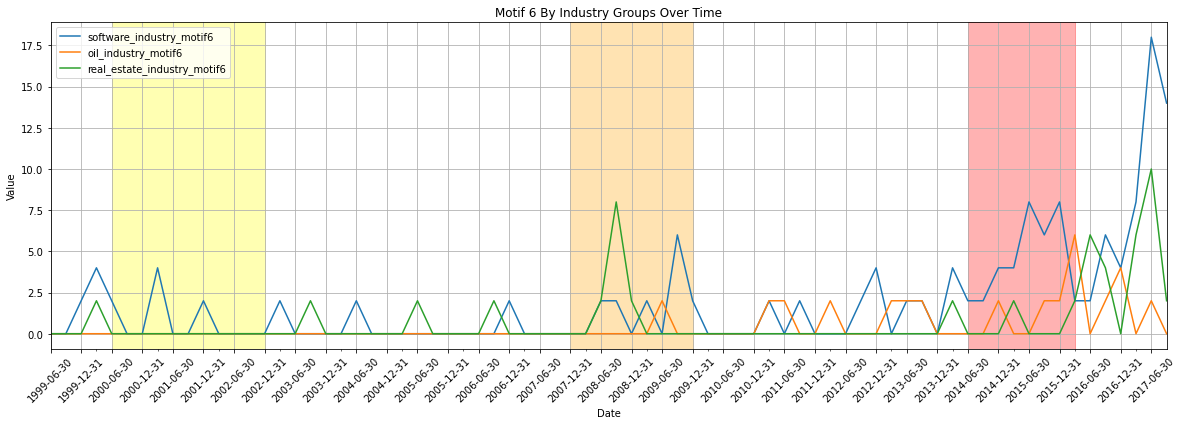

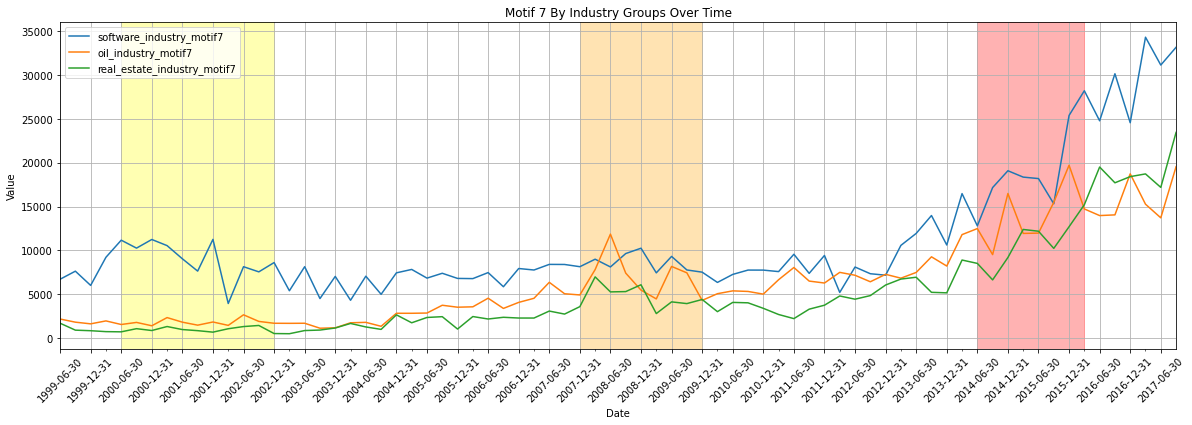

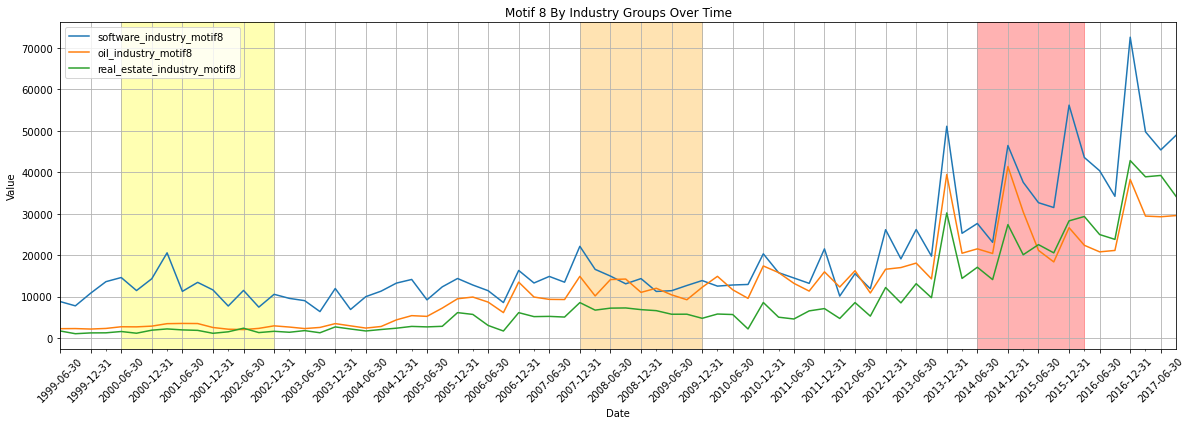

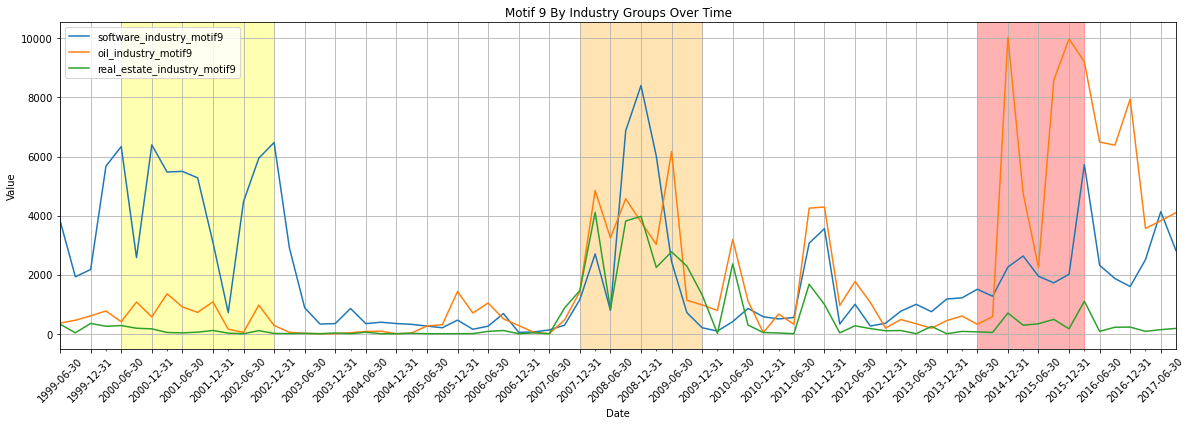

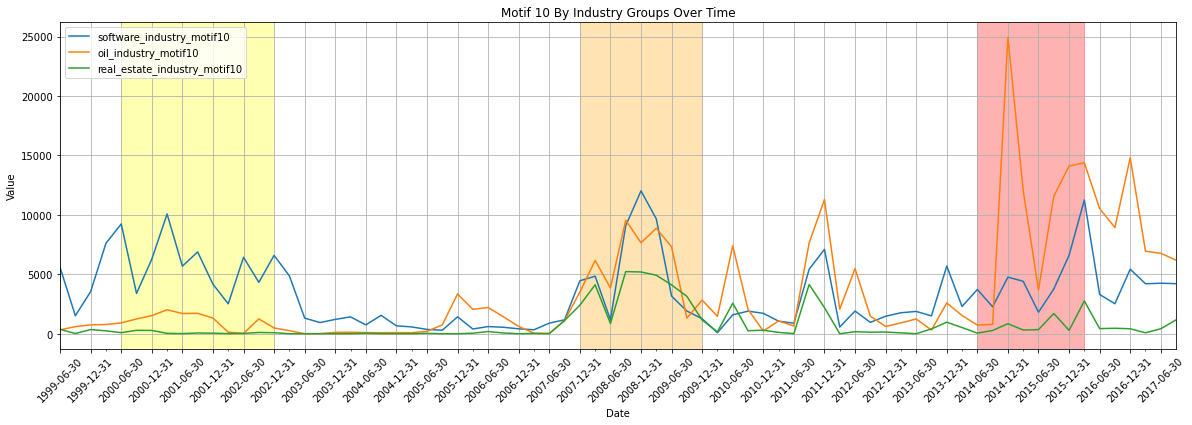

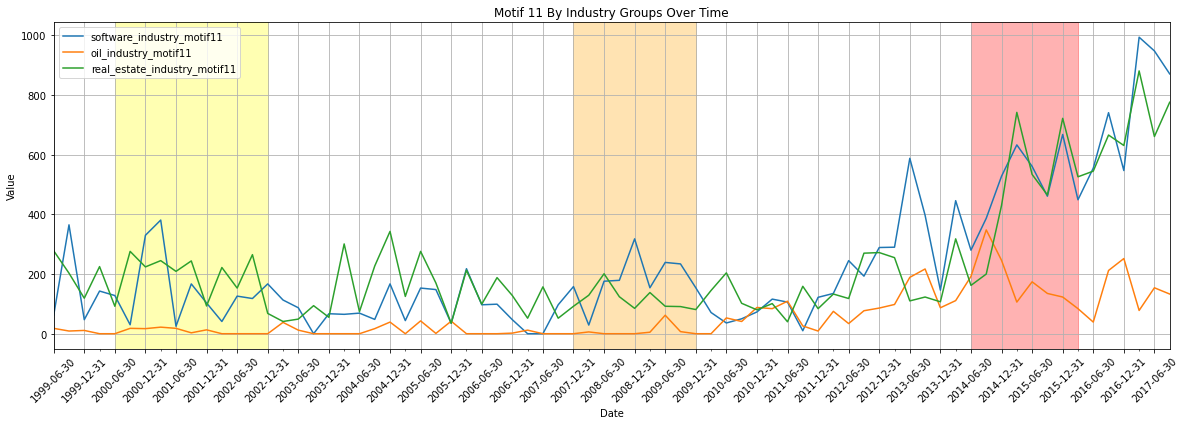

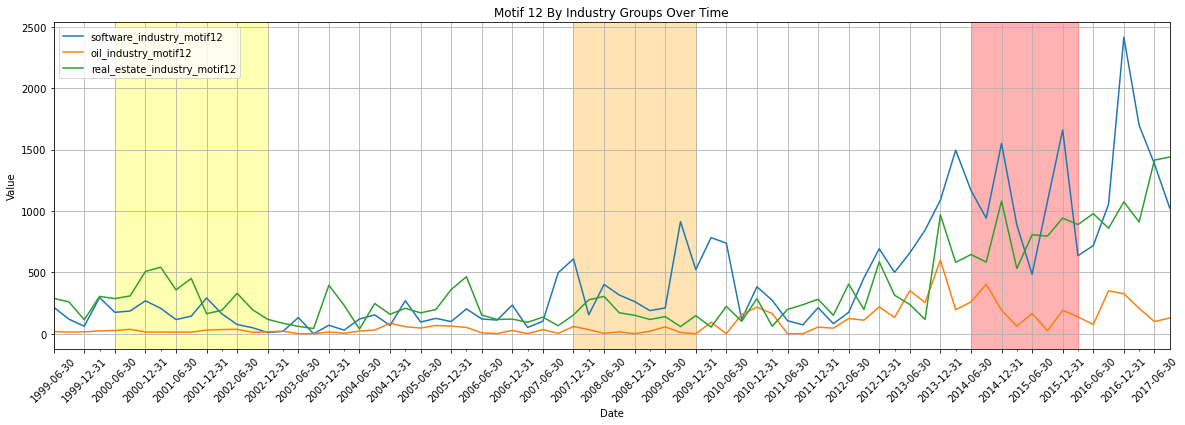

In [68]:


for idx in range(1,13):
    idx = str(idx)
    motif = "motif"+idx
    caption = "Motif "+idx+" By Industry Groups Over Time"
    substring = "total"
    dfd = drop_cols(dataframe.copy(), substring)
    

    df4 = create_dataframe_with_substring(dfd, motif)

    plot_dataframe(df4, caption)
    
    # MOTIF1 DIŞINDAKİLERİ ÇIKARIYOR.



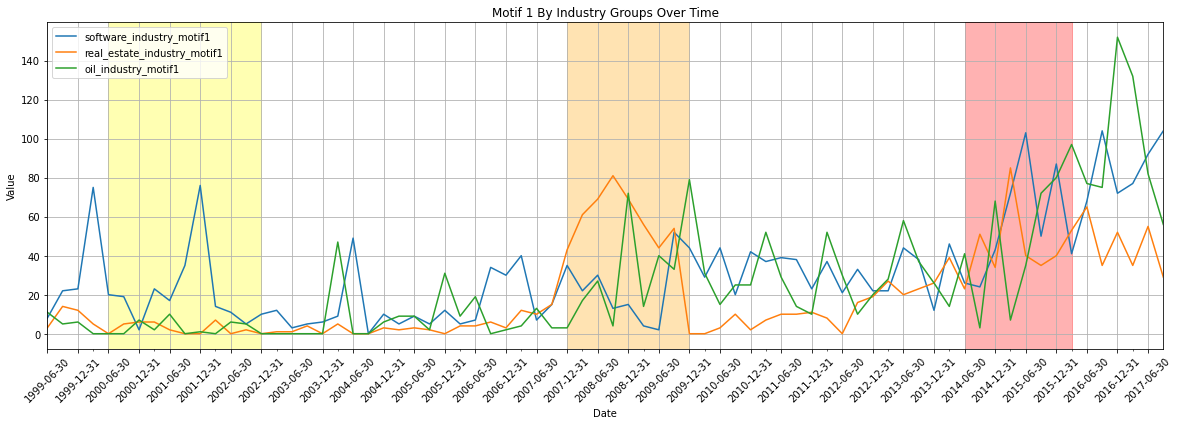

In [69]:
motif1 = ["software_industry_motif1", "real_estate_industry_motif1","oil_industry_motif1"]

motif1 = dataframe[motif1].copy()
plot_dataframe(motif1, "Motif 1 By Industry Groups Over Time")

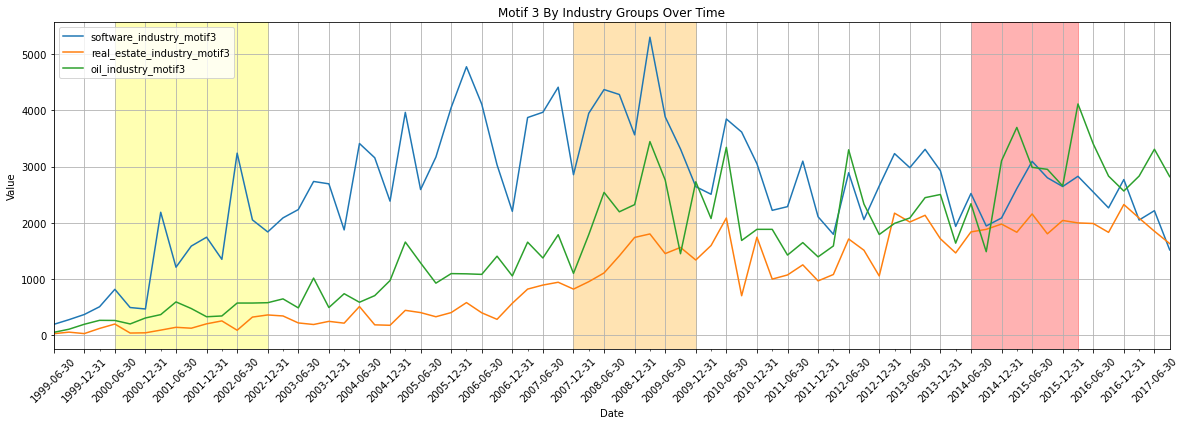

In [70]:
motif3 = ["software_industry_motif3", "real_estate_industry_motif3","oil_industry_motif3"]

motif3 = dataframe[motif3].copy()
plot_dataframe(motif3, "Motif 3 By Industry Groups Over Time")

# PLOT TOTAL MOTIFS

In [59]:
lst = []
# lst.append('date')

for idx in range(1,13):
    lst.append('total_graph_motif'+str(idx))
    
print(lst)

df_totals = dataframe[lst].copy()

['total_graph_motif1', 'total_graph_motif2', 'total_graph_motif3', 'total_graph_motif4', 'total_graph_motif5', 'total_graph_motif6', 'total_graph_motif7', 'total_graph_motif8', 'total_graph_motif9', 'total_graph_motif10', 'total_graph_motif11', 'total_graph_motif12']


In [60]:
df_totals.head()

,total_graph_motif1,total_graph_motif2,total_graph_motif3,total_graph_motif4,total_graph_motif5,total_graph_motif6,total_graph_motif7,total_graph_motif8,total_graph_motif9,total_graph_motif10,total_graph_motif11,total_graph_motif12
date,,,,,,,,,,,,
1999-06-30,365,42,3584,499,22,2,135331,169471,39167,50541,3489,3654
1999-09-30,424,64,7846,666,80,18,113315,159286,14073,22121,3286,3346
1999-12-31,281,2,7748,744,34,12,115387,180274,44403,73676,3200,3453
2000-03-31,482,3,12730,373,2,12,141297,180689,73496,91387,2452,3224
2000-06-30,340,26,11984,519,26,20,128853,161678,54702,69085,2635,2977


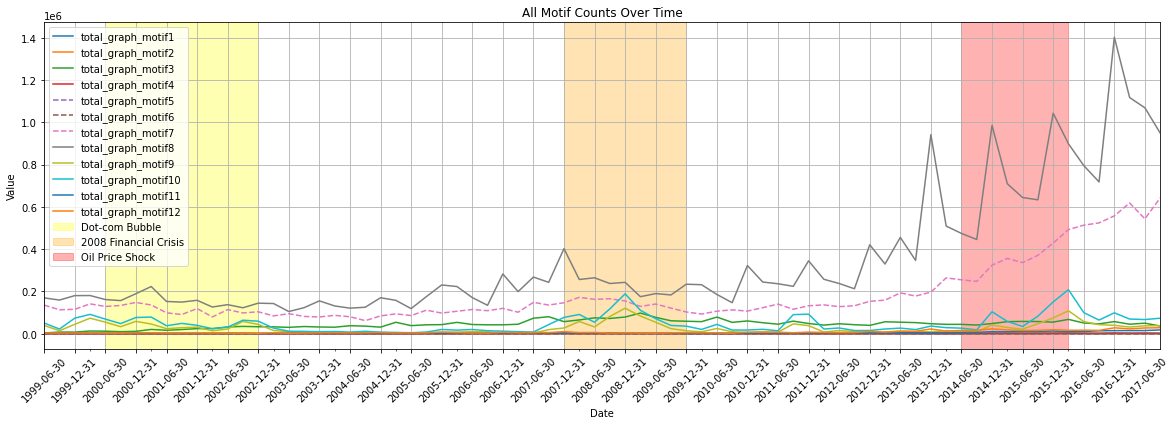

In [64]:
plot_dataframe(df_totals, "All Motif Counts Over Time")

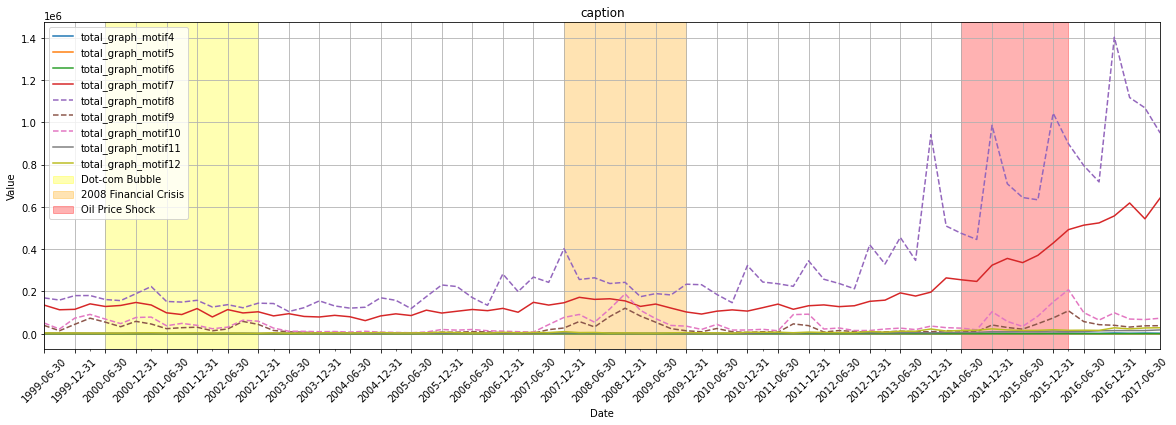

In [63]:
df_dropped = df_totals.drop(columns=["total_graph_motif1", "total_graph_motif2", "total_graph_motif3"], axis=1)
plot_dataframe(df_dropped, "caption")

C:\Users\ersin\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ersin\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


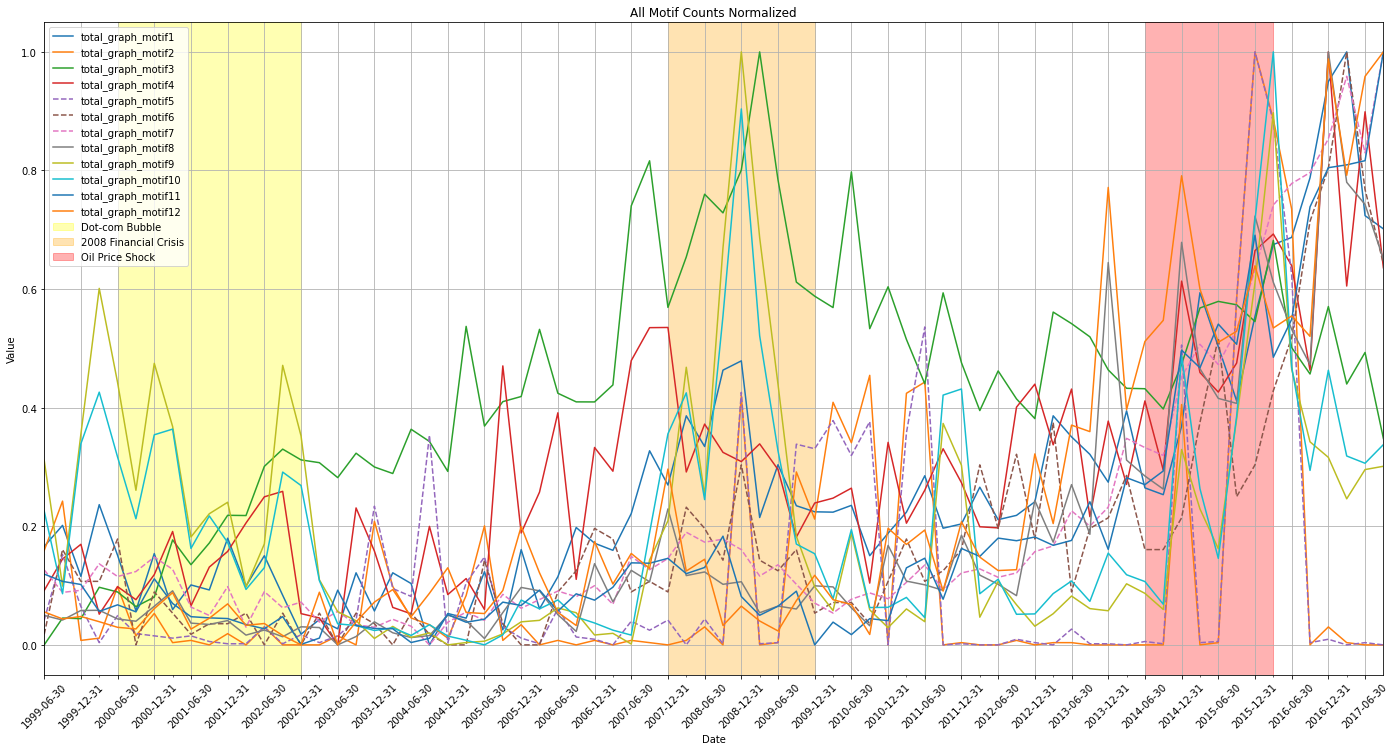

In [66]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt



def plot_dataframe(df_clustering, title): 

    # Convert the index to datetime
    df_clustering.index = pd.to_datetime(df_clustering.index)

    dot_com_start = '2000-06-30'
    dot_com_end = '2002-12-31'

    financial_start = '2007-12-31'
    financial_end = '2009-12-31'

    oil_start = '2014-06-30'
    oil_end = '2016-03-31'

    # Plotting
    ax = df_clustering.plot(kind="line", figsize=(24, 12), style=["-", "-", "-", "-", "--", "--", "--"], legend=False)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")

    # Set x-axis labels to each date in the DataFrame's index, skipping one by one
    xticks_labels = df_clustering.index[::2]  # Change the number '2' to skip more/less
    plt.xticks(ticks=xticks_labels, labels=[label.strftime('%Y-%m-%d') for label in xticks_labels], rotation=45)

    # Apply colored spans
    ax.axvspan(pd.to_datetime(dot_com_start), pd.to_datetime(dot_com_end), color='yellow', alpha=0.3, label='Dot-com Bubble')
    ax.axvspan(pd.to_datetime(financial_start), pd.to_datetime(financial_end), color='orange', alpha=0.3, label='2008 Financial Crisis')
    ax.axvspan(pd.to_datetime(oil_start), pd.to_datetime(oil_end), color='red', alpha=0.3, label='Oil Price Shock')
    
    ax.legend(loc='upper left')
    plt.grid(True)
    plt.show()
    



# Extract numeric columns from the DataFrame
numeric_columns = df_totals.select_dtypes(include='number').columns

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
df_normalized = df_totals.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df_totals[numeric_columns])


plot_dataframe(df_normalized, "All Motif Counts Normalized")


